In [72]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [74]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [75]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [76]:
# reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [77]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [79]:
# Find the most recent date in the data set.
# Define Measurement
Measurement = Base.classes.measurement
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= year_ago_date).\
            order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_scores_db = pd.DataFrame(prcp_scores, columns=['date', 'precipitation']).set_index('date')

# Sort the dataframe by date
prcp_scores_db = prcp_scores_db.sort_index(ascending = True).dropna()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_db.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


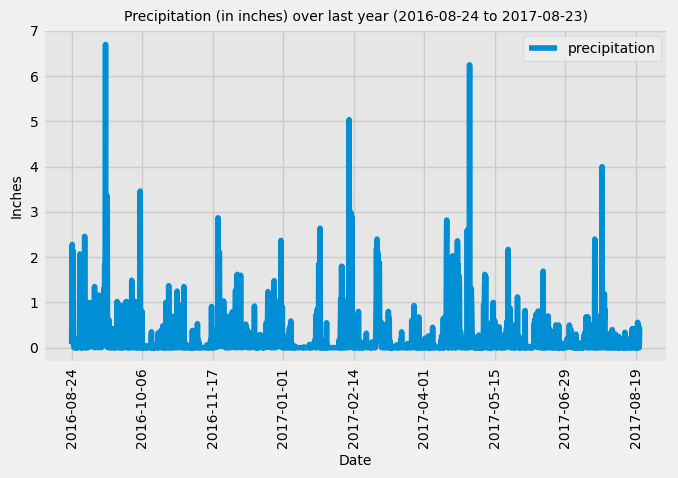

In [81]:
# Use Pandas to calculate the summary statistics for the precipitation data
Image1 = prcp_scores_db.plot(figsize=(7,5), fontsize=10, rot=90)

# Labels and Title for axis
plt.xlabel("Date", size=10)
plt.ylabel("Inches", size=10)
plt.title("Precipitation (in inches) over last year (2016-08-24 to 2017-08-23)", size=10)

# Legend
Image1.set_facecolor('0.9')
plt.grid(True, alpha=1.0)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

# Save image of the chart 
plt.savefig('Images1')

# Show the chart
plt.show()

# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number of stations in the dataset
# Define Station
Station = Base.classes.station
total_stations = session.query(Station.station).count()

In [83]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Define most_active_station
most_active_station = active_stations[0][0]

# Create list for temperature values
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

# Calculate the temperature values
most_active_station_temperatures = session.query(*sel).\
                                   filter(Measurement.station == most_active_station).all()

# Show the temperature values
print(f"The lowest temperature at {most_active_station} is {most_active_station_temperatures[0][0]} Fahrenheit.")
print(f"The highest temperature at {most_active_station} is {most_active_station_temperatures[0][1]} Fahrenheit.")
print(f"The average temperature at {most_active_station} is {round(most_active_station_temperatures[0][2], 3)} Fahrenheit.")

The lowest temperature at USC00519281 is 54.0 Fahrenheit.
The highest temperature at USC00519281 is 85.0 Fahrenheit.
The average temperature at USC00519281 is 71.664 Fahrenheit.


In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
                    filter(Measurement.station == most_active_station).\
                    filter(Measurement.date >= year_ago_date).\
                    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame
station_temp_db = pd.DataFrame(station_temp_data)

# Display the dataset
station_temp_db.head()



,date,station,tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0


# Close Session

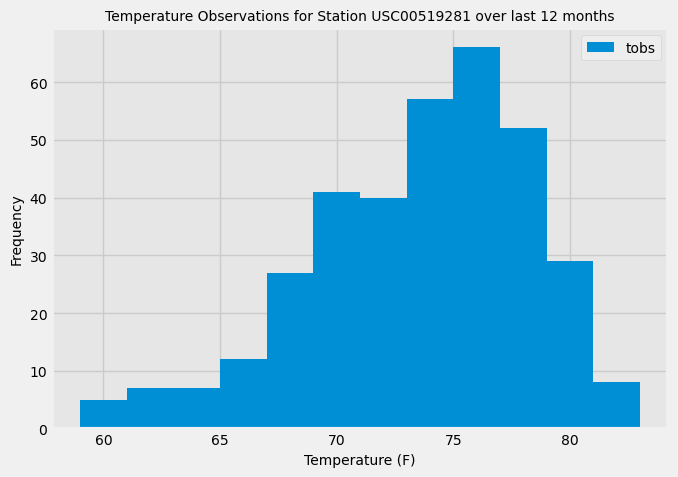

In [86]:
#Histogram
Image2 = station_temp_db.plot(kind='hist', bins=12, fontsize=10, figsize=(7,5))

# Labels and Title for axis
plt.xlabel("Temperature (F)", size=10)
plt.ylabel("Frequency", size=10)
plt.title("Temperature Observations for Station USC00519281 over last 12 months", size=10)

# Legend 
Image2.set_facecolor('0.9')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=1.0)
plt.tight_layout()

# Save image of the chart 
plt.savefig('Image2')

# Show the chart
plt.show()

In [87]:
# Close Session
session.close()

In [88]:
session.close()